In [1]:
import pandas as pd


In [101]:
import numpy as np

In [2]:
data=pd.read_csv("3.1 loan_data_2007_2014.csv")

C:\Users\Elitebook 850 G3\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [62]:
file=data.copy()

In [58]:
file

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [66]:
file=file.dropna(axis=1)

In [68]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               466285 non-null  int64  
 1   id                       466285 non-null  int64  
 2   member_id                466285 non-null  int64  
 3   loan_amnt                466285 non-null  int64  
 4   funded_amnt              466285 non-null  int64  
 5   funded_amnt_inv          466285 non-null  float64
 6   term                     466285 non-null  object 
 7   int_rate                 466285 non-null  float64
 8   installment              466285 non-null  float64
 9   grade                    466285 non-null  object 
 10  sub_grade                466285 non-null  object 
 11  home_ownership           466285 non-null  object 
 12  verification_status      466285 non-null  object 
 13  issue_d                  466285 non-null  object 
 14  loan

In [75]:
file["application_type"].dtype=='O'

True

In [74]:
file["recoveries"].dtype=="float64"

True

In [95]:
column=file.columns
encode=[]
for i in column:
    if file[i].dtype=='O':
        encode.append(i)

In [96]:


cols=encode.copy()

In [97]:
encode.remove("loan_status") 

In [78]:
import category_encoders as ce

In [81]:
X = file.drop(['loan_status'], axis=1)

y = file['loan_status']

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size = 0.75, random_state = 12)

In [85]:
X_train.shape, X_test.shape

((349713, 34), (116572, 34))

In [89]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=encode)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [90]:
X_train

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type
256211,256211,34442764,37106084,7500,7500,7500.0,1,6.49,229.84,1,...,3213.70000,3213.70,2745.09,468.61,0.0,0.0,0.0,229.84,1,1
304702,304702,27651956,30155111,35000,35000,35000.0,2,16.99,869.66,2,...,13044.90000,13044.90,6203.57,6841.33,0.0,0.0,0.0,869.66,1,1
80337,80337,7726513,5459644,10000,10000,10000.0,1,13.67,340.18,3,...,9184.42000,9184.42,7105.60,2078.82,0.0,0.0,0.0,340.18,1,1
146366,146366,4291800,5484552,21200,21200,21200.0,1,11.14,695.47,3,...,24859.08295,24859.08,21200.00,3659.08,0.0,0.0,0.0,6082.29,1,1
436135,436135,12396126,14408272,13925,13925,13925.0,1,14.64,480.27,4,...,14581.63446,14581.63,13925.00,656.63,0.0,0.0,0.0,13140.82,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36482,36482,410010,461110,2100,2100,2000.0,1,12.21,69.97,3,...,2204.81000,2099.82,2100.00,104.81,0.0,0.0,0.0,4.65,1,1
40177,40177,568705,731615,3000,3000,2975.0,2,13.98,69.78,4,...,3069.58000,3044.00,3000.00,69.58,0.0,0.0,0.0,0.84,1,1
412925,412925,13378578,15420840,15000,15000,15000.0,1,10.99,491.01,3,...,16555.54000,16555.54,15000.00,1555.54,0.0,0.0,0.0,10663.42,1,1
255366,255366,34503687,37167054,35000,35000,35000.0,2,15.59,843.53,2,...,9336.39000,9336.39,4565.98,4770.41,0.0,0.0,0.0,843.53,1,1


In [91]:

encoder = ce.OrdinalEncoder(cols=["loan_status"])

y_train = encoder.fit_transform(y_train)

y_test = encoder.transform(y_test)

In [94]:
len(data["loan_status"].unique()),len(y_train["loan_status"].unique())

(9, 9)

In [98]:
encode.remove("loan_status") 
encoder = ce.OrdinalEncoder(cols=cols)

file = encoder.fit_transform(file)

#y_test = encoder.transform(y_test)

In [99]:
file

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type
0,0,1077501,1296599,5000,5000,4975.0,1,10.65,162.87,1,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1,1
1,1,1077430,1314167,2500,2500,2500.0,2,15.27,59.83,2,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,1
2,2,1077175,1313524,2400,2400,2400.0,1,15.96,84.33,2,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1,1
3,3,1076863,1277178,10000,10000,10000.0,1,13.49,339.31,2,...,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1,1
4,4,1075358,1311748,3000,3000,3000.0,2,12.69,67.79,1,...,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,2,14.47,432.64,2,...,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64,1,1
466281,466281,9684700,11536848,22000,22000,22000.0,2,19.97,582.50,6,...,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50,1,1
466282,466282,9584776,11436914,20700,20700,20700.0,2,16.99,514.34,6,...,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34,1,1
466283,466283,9604874,11457002,2000,2000,2000.0,1,7.90,62.59,3,...,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,1500.68,1,1


In [182]:

cor = np.abs(file.corr()["loan_status"])
features=cor[cor > 0.3]
features

id                 0.321435
member_id          0.325394
loan_status        1.000000
out_prncp          0.547850
out_prncp_inv      0.547813
total_rec_prncp    0.381288
last_pymnt_amnt    0.485601
Name: loan_status, dtype: float64

In [192]:
feature=features.keys().tolist()
feature.remove("loan_status")

In [184]:
#X=file.drop(columns=["loan_status"])
#y=file["loan_status"]

In [193]:
X=file[feature]
y=file["loan_status"]

In [200]:
X

,id,member_id,out_prncp,out_prncp_inv,total_rec_prncp,last_pymnt_amnt
0,1077501,1296599,0.00,0.00,5000.00,171.62
1,1077430,1314167,0.00,0.00,456.46,119.66
2,1077175,1313524,0.00,0.00,2400.00,649.91
3,1076863,1277178,0.00,0.00,10000.00,357.48
4,1075358,1311748,766.90,766.90,2233.10,67.79
...,...,...,...,...,...,...
466280,8598660,1440975,12574.00,12574.00,5826.00,432.64
466281,9684700,11536848,0.00,0.00,1837.04,17.50
466282,9584776,11436914,14428.31,14428.31,6271.69,514.34
466283,9604874,11457002,0.00,0.00,2000.00,1500.68


In [194]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size = 0.75, random_state = 12)

In [195]:
from sklearn.tree import DecisionTreeClassifier

In [196]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model


In [197]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model

clf_entropy.fit(X_train, y_train)
y_pred = clf_entropy.predict(X_test)

In [198]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy index: 0.9242


# Check for over or under fitting

In [199]:
print('Training set score: {:.4f}'.format(clf_entropy.score(X_train, y_train)*100))

print('Test set score: {:.4f}'.format(clf_entropy.score(X_test, y_test)*100))

Training set score: 92.3106
Test set score: 92.4219


In [147]:
y_test=pd.DataFrame(y_test)
y_test=y_test.reset_index()
y_pred=pd.DataFrame(y_pred)

In [151]:
pd.concat([y_test["loan_status"],y_pred],axis=1).head(40)

,loan_status,0
0,3,3
1,1,1
2,3,3
3,3,3
4,3,3
5,1,1
6,2,2
7,1,1
8,1,1
9,1,1


In [203]:
X

,id,member_id,out_prncp,out_prncp_inv,total_rec_prncp,last_pymnt_amnt
0,1077501,1296599,0.00,0.00,5000.00,171.62
1,1077430,1314167,0.00,0.00,456.46,119.66
2,1077175,1313524,0.00,0.00,2400.00,649.91
3,1076863,1277178,0.00,0.00,10000.00,357.48
4,1075358,1311748,766.90,766.90,2233.10,67.79
...,...,...,...,...,...,...
466280,8598660,1440975,12574.00,12574.00,5826.00,432.64
466281,9684700,11536848,0.00,0.00,1837.04,17.50
466282,9584776,11436914,14428.31,14428.31,6271.69,514.34
466283,9604874,11457002,0.00,0.00,2000.00,1500.68


In [270]:
#arr=pd.DataFrame([1077502],[1296594],[1],[int(5000.00)],[171])
#clf_entropy.predict(arr)

[Text(334.8, 380.52, 'X[23] <= 0.005\nentropy = 1.579\nsamples = 349713\nvalue = [138522, 31909, 168123, 631, 5173, 2370, 914, 1493, 578]'),
 Text(167.4, 271.8, 'X[29] <= 0.125\nentropy = 0.794\nsamples = 172532\nvalue = [138522, 31909, 21, 1, 2, 6, 0, 1493, 578]'),
 Text(83.7, 163.07999999999998, 'X[31] <= 1304.795\nentropy = 0.535\nsamples = 154295\nvalue = [138522, 14043, 21, 1, 2, 6, 0, 1493, 207]'),
 Text(41.85, 54.360000000000014, 'entropy = 1.014\nsamples = 50773\nvalue = [35686, 13878, 2, 0, 0, 2, 0, 999, 206]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.065\nsamples = 103522\nvalue = [102836, 165, 19, 1, 2, 4, 0, 494, 1]'),
 Text(251.10000000000002, 163.07999999999998, 'X[1] <= 641673.0\nentropy = 0.143\nsamples = 18237\nvalue = [0, 17866, 0, 0, 0, 0, 0, 0, 371]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.772\nsamples = 1638\nvalue = [0, 1267, 0, 0, 0, 0, 0, 0, 371]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.0\nsamples = 16599\nvalue = [0, 16599, 

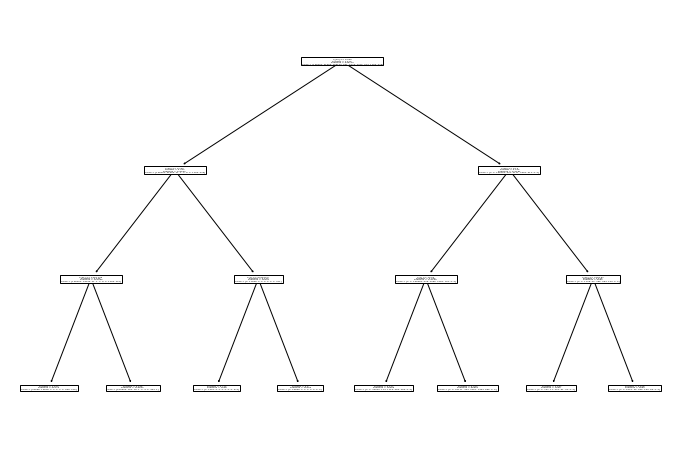

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_entropy.fit(X_train, y_train)) 


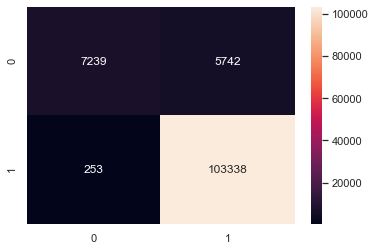

In [269]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True , fmt = "d")

# With logistic Regression

In [216]:
df=data.copy()

In [220]:
df=df.dropna(axis=1)

In [221]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1,INDIVIDUAL
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1,INDIVIDUAL
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1,INDIVIDUAL
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64,1,INDIVIDUAL
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50,1,INDIVIDUAL
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34,1,INDIVIDUAL
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,1500.68,1,INDIVIDUAL


In [222]:
default = ["Default","Charged Off","Late (31-120 days","Late (16-30 days)","Late (31-120 days)","Does not meet the credit policy. Status:Charged Off"]
un_default = ["Current", "Fully Paid" ,"In Grace Period","Does not meet the credit policy. Status:Fully Paid"]
df["loan_status"] = df["loan_status"].replace(default, '0')
df["loan_status"] = df["loan_status"].replace(un_default, '1')

<ipython-input-222-99cc0d7f4e33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loan_status"] = df["loan_status"].replace(default, '0')
<ipython-input-222-99cc0d7f4e33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loan_status"] = df["loan_status"].replace(un_default, '1')


In [224]:
df["loan_status"]

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: loan_status, Length: 466285, dtype: object

In [225]:

encoder = ce.OrdinalEncoder(cols=cols)

file = encoder.fit_transform(file)

#y_test = encoder.transform(y_test)

In [227]:

cor = np.abs(file.corr()["loan_status"])
features=cor[cor > 0.3]
features

id                 0.321435
member_id          0.325394
loan_status        1.000000
out_prncp          0.547850
out_prncp_inv      0.547813
total_rec_prncp    0.381288
last_pymnt_amnt    0.485601
Name: loan_status, dtype: float64

In [272]:
feature=features.keys().tolist()
feature.remove("loan_status")
X=file.drop(columns=["loan_status"])
y=df["loan_status"]

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size = 0.75, random_state = 12)
from sklearn.linear_model import LogisticRegression
cv = LogisticRegression()
cv.fit(X_train, y_train)
predict = cv.predict(X_test)

C:\Users\Elitebook 850 G3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [274]:
len(X_train),len(X_test),len(y_test),len(y_train)

(349713, 116572, 116572, 349713)

In [275]:
len(predict),len(y_test)

(116572, 116572)

In [276]:
from sklearn.metrics import accuracy_score

print('Model accuracy: {0:0.4f}'. format(accuracy_score(y_test, predict)))

Model accuracy: 0.9486


# check for over or underfit

In [256]:
print('Training set score: {:.4f}'.format(cv.score(X_train, y_train)*100))

print('Test set score: {:.4f}'.format(cv.score(X_test, y_test)*100))

Training set score: 94.8343
Test set score: 94.8573


In [263]:
#cv.score(X_train,y_train),cv.score(X_test,y_test)

(0.9483433558375011, 0.9485725560168823)

In [258]:
y_train

256211    1
304702    1
80337     1
146366    1
436135    1
         ..
36482     1
40177     1
412925    1
255366    0
235163    1
Name: loan_status, Length: 349713, dtype: object

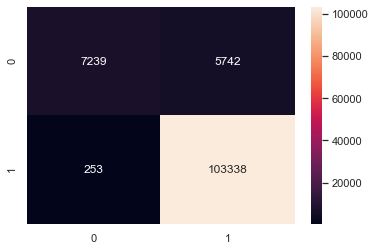

In [260]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot = True , fmt = "d")

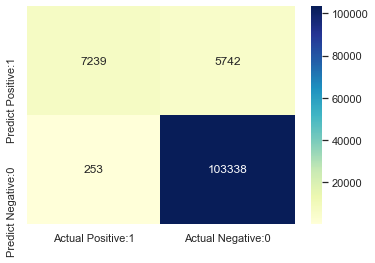

In [271]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# extras

In [ ]:
def dummies(x,df):
    temp = pd.get_dummies(df[x])
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

final = dummies("fuelType",final)
final = dummies("transmission",final)


In [5]:
t=data.isnull().sum()==0
len(t[t==False])

40

In [46]:
file.dropna(how='all', axis=1, inplace=True)

In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [8]:
t=file.notnull().sum()>466000 
a=t[t==False]

In [9]:
a.keys()

Index(['emp_title', 'emp_length', 'desc', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')

# to drop unique columns 

In [31]:
columns=file.columns.tolist()
#for i in file["id"]
drop_col=[]
for i in columns:
    if len(file[i].unique()) == (len(file)):
        drop_col.append(i)

In [32]:
columns

['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_a

In [11]:
file=file.drop(columns=drop_col)

In [20]:
file[i].unique()

array([    nan,  59900.,  15100., ..., 102342.,  71491., 479500.])

In [29]:
len(file["loan_amnt"].unique())

1352

In [33]:
file["zip_code"]

0         860xx
1         309xx
2         606xx
3         917xx
4         972xx
          ...  
466280    773xx
466281    377xx
466282    458xx
466283    913xx
466284    950xx
Name: zip_code, Length: 466285, dtype: object

In [15]:
#file.drop[["open_acc_6m","annual_inc_joint","verification_status_joint ","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il",""]]
len(file[["annual_inc_joint","dti_joint","verification_status_joint","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","inq_fi","total_cu_tl","inq_last_12m"]] 
 

SyntaxError: unexpected EOF while parsing (<ipython-input-15-51d47ff1a7c9>, line 3)

In [54]:
file=file.dropna(how='all', axis=0, inplace=True)

In [40]:
import category_encoders as ce

In [41]:
ce_ord = ce.OrdinalEncoder(cols = ['loan_status'])
#ce_ord.fit_transform(X, y['outcome'])

In [42]:
ce_ord

OrdinalEncoder(cols=['loan_status'])

In [2]:
import re
re.sub('[^a-zA-Z]',' ',"65")

'  '